### 1. Imports

In [1]:
import os
import pandas as pd
import numpy as np
from lcfunctions import download_alerce_lc, download_lasair_lc, display_lightcurve
from lcfunctions import lasair_clean, load_lasair_lc
from scipy.signal import find_peaks
from scipy.stats import linregress
from featureextractor import FeatureExtractor
from raw_processing import label_schemes
import warnings
warnings.filterwarnings("ignore")

### 2. Load dataframe of AAVSO CVs in ZTF

In [2]:
# Load dataset
# df_ZTF_CVs = pd.read_csv('../processed_data/AAVSOCVsZTFxmatch_21032023_BTS_labelled.csv')
cvs_df = pd.read_csv('../processed_data/AAVSOCVsZTFxmatch_21032023_BTS_manual_labelled.csv')

# Process the dataframe
dataset = label_schemes(cvs_df)
dataset

,oid_ztf,oid_aavso,type_aavso,ra,dec,Eclipsing,CV_Types,CV_subtypes,CV_subsubtypes,eclipse_clear,manual_label,Clarity,labels_1,labels_2,labels_3,labels_4
0,ZTF18abryuah,ASASSN-19dp,AM,35.745917,43.653639,0,polar,NaN,NaN,0.0,AM_Her,1.0,polar,polar,polar,magnetic
1,ZTF18abtrvgp,BMAM-V789,AM,38.492292,41.623972,0,polar,NaN,NaN,0.0,AM_Her,1.0,polar,polar,polar,magnetic
2,ZTF17aaaehby,CSS 091026:002637+242916,AM,6.654417,24.487694,0,polar,NaN,NaN,0.0,AM_Her,1.0,polar,polar,polar,magnetic
3,ZTF18abgjgiq,MGAB-V3453,AM,8.972375,43.561528,0,polar,NaN,NaN,0.0,AM_Her,1.0,polar,polar,polar,magnetic
4,ZTF18abumlux,MGAB-V3769,AM,353.638167,40.430611,0,polar,NaN,NaN,0.0,AM_Her,1.0,polar,polar,polar,magnetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,ZTF22aazmooy,NaN,N,10.539250,41.258667,0,nova,NaN,NaN,0.0,nova_decline,1.0,nova_decline,nova,nova,nova
5704,ZTF22abfxmpc,NaN,N,10.625167,41.936806,0,nova,NaN,NaN,0.0,nova,1.0,nova,nova,nova,nova
5705,ZTF22abnrgno,NaN,N,10.941000,41.266278,0,nova,NaN,NaN,0.0,nova,1.0,nova,nova,nova,nova
5706,ZTF22abtltcw,NaN,N,10.357167,40.739806,0,nova,NaN,NaN,0.0,nova_decline,1.0,nova_decline,nova,nova,nova


In [3]:
# List of objects.
lst = dataset.oid_aavso.to_list()
# Check length of objects list
print(f'Length of list of objects: {len(lst)}')

Length of list of objects: 5708


### Display light curves

In [20]:
date = '2023_03_25'

manuallist = False

# Apply errorbars
error = False
start = 60
end = 100
column = 'labels_2'
objclass = 'dwarf_nova_Z_Cam'

if error == True:
        errCollasair1 = 'sigmapsf'
        errCollasair2 = 'dc_sigmag'
else:
    errCollasair1 = None
    errCollasair2 = None

# objlist = dataset[dataset[column].str.contains('UGSS', na=False)]['oid_ztf'].iloc[start:end]
# objtype = dataset[dataset[column].str.contains('UGSS', na=False)]['type_aavso'].iloc[start:end]
objlist = dataset[dataset[column].isin([objclass])]['oid_ztf'].iloc[start:end]
objtype = dataset[dataset[column].isin([objclass])]['type_aavso'].iloc[start:end]
# objlist = dataset[dataset[column]>0]['oid_ztf'].iloc[start:end]
# objtype = dataset[dataset[column]>0]['type_aavso'].iloc[start:end]

if manuallist==True:
     objlist = ['ZTF19aaontsz', 'ZTF21acdinya', 'ZTF22aahisfz', 'ZTF19aaxnqtg',
       'ZTF18adqfzli', 'ZTF18aabgsjq', 'ZTF17aadpvbz', 'ZTF20acqzguf',
       'ZTF18accemjz', 'ZTF18abxxpkk', 'ZTF18aaylslx', 'ZTF19aacgush',
       'ZTF18adooaph', 'ZTF18absrqum', 'ZTF19acwgoya', 'ZTF18abuocqk',
       'ZTF22aaykkiq', 'ZTF18adqqrtm']
     objtype = ['N', 'N', 'N', 'UGSU', 'UGSU', 'UGSU', 'UGSU', 'UGSU', 'UGSU',
       'UGSU', 'UGSU', 'UGSU', 'UGSU', 'UGSU', 'UGSU', 'UGSU', 'UGWZ',
       'UGZ/IW']

i=0
for object, type in zip(objlist, objtype):
    print(i, object, type)
    
    # Display lasair difference magnitude and apparent magnitude light curves.
    lc_lasair = load_lasair_lc(object, path=f'../lightcurves_dataset/lasair_{date}')
    lc_lasair_appmag = lasair_clean(lc_lasair, limit=25, magerrlim=1)

    # print('Lasair difference magnitude')
    # display_lightcurve(lc_lasair,x='jd',y='magpsf',errorCol=errCollasair1)
    print('Lasair apparent magnitude')
    display_lightcurve(lc_lasair_appmag,x='jd',y='dc_mag',errorCol=errCollasair2)
    i+=1


0 ZTF18abjedws UGZ
Lasair apparent magnitude


1 ZTF18absmxfm UGZ
Lasair apparent magnitude


2 ZTF20aarfjgo UGZ
Lasair apparent magnitude


3 ZTF17aaakhci UGZ
Lasair apparent magnitude


4 ZTF18abwkvae UGZ
Lasair apparent magnitude


5 ZTF19aamnudr UGZ
Lasair apparent magnitude


6 ZTF18admqaga UGZ
Lasair apparent magnitude


7 ZTF17aaarlwe UGZ
Lasair apparent magnitude


8 ZTF19aakwlhx UGZ
Lasair apparent magnitude


9 ZTF19acicjxs UGZ
Lasair apparent magnitude


10 ZTF18abmewgx UGZ
Lasair apparent magnitude


11 ZTF18abjvcdq UGZ
Lasair apparent magnitude


12 ZTF17aabpiiv UGZ
Lasair apparent magnitude


13 ZTF19aamofdr UGZ
Lasair apparent magnitude


14 ZTF18aaxujwc UGZ
Lasair apparent magnitude


15 ZTF18abstqob UGZ
Lasair apparent magnitude


16 ZTF18adkprfh UGZ
Lasair apparent magnitude


17 ZTF18abfjdrn UGZ
Lasair apparent magnitude


18 ZTF19aafnpkc UGZ
Lasair apparent magnitude


19 ZTF17aadepqh UGZ
Lasair apparent magnitude


20 ZTF17aaczptk UGZ
Lasair apparent magnitude


21 ZTF18admdwxv UGZ
Lasair apparent magnitude


22 ZTF18acwywfz UGZ
Lasair apparent magnitude


23 ZTF18abtoupn UGZ
Lasair apparent magnitude


24 ZTF18absnrin UGZ
Lasair apparent magnitude


25 ZTF18absnrzk UGZ
Lasair apparent magnitude


26 ZTF18aasnqbc UGZ
Lasair apparent magnitude


27 ZTF18abnbpcl UGZ
Lasair apparent magnitude


28 ZTF18aauemog UGZ
Lasair apparent magnitude


29 ZTF19aakvpme UGZ+E
Lasair apparent magnitude


30 ZTF18abdkhjm UGZ+E
Lasair apparent magnitude


31 ZTF18abcnxvd UGZ+E
Lasair apparent magnitude


32 ZTF18abeymdp UGZ+E
Lasair apparent magnitude


33 ZTF18aaaqvfx UGZ+E
Lasair apparent magnitude


34 ZTF18abuduzu UGZ+E
Lasair apparent magnitude


35 ZTF19acyycev UGZ/IW
Lasair apparent magnitude


36 ZTF17aaaenhs UGZ/IW
Lasair apparent magnitude


37 ZTF18aazwdho UGZ/IW
Lasair apparent magnitude


38 ZTF18abcpdil UGZ/IW
Lasair apparent magnitude


39 ZTF18abjtkzh UGZ/IW
Lasair apparent magnitude


### Extract custom features

In [5]:
import numpy as np

save = False

objlist = ['ZTF18aanwrti','ZTF18abmaqoi','ZTF18aabfcyi','ZTF18aakvuwy','ZTF18abajshu','ZTF20abgbxco','ZTF21abhrevv',
           'ZTF18aagrgoe','ZTF18abchhxd']
objlist = dataset['oid_ztf'].to_list()[0:0]
feature_df = pd.DataFrame()
for obj in objlist:
    type = dataset[dataset['oid_ztf']==obj]['type_aavso'].iloc[0]
    print(obj, type)

    # Load and process lasair light curve
    lc_test = load_lasair_lc(oid=obj, path=f'../lightcurves_dataset/lasair_{date}')
    lc_appmag_test = lasair_clean(lc_test, limit=25, magerrlim=1)

    # Create a copy of the light curve
    lc = lc_appmag_test.copy()

    fe = FeatureExtractor(lc=lc)
    feets = fe.extract_feets()
    custom = fe.extract_custom()
    
    # Conactenate custom features to feets
    features_single = pd.concat([feets, custom], axis=1)

    # Add features to dataframe
    feature_df = feature_df.append(features_single, ignore_index=True)


# Add source data to the dataframe
lc_features_df = pd.concat([dataset, feature_df], axis=1)

if save == True:
    # Save the dataframe
    lc_features_df.to_csv(f'../processed_data/lc_features_test.csv', index=False)

# Load the dataframe
lc_features_df = pd.read_csv(f'../processed_data/lc_features_test.csv')


### Get Gaia DR3 data

In [6]:
from metadatafeatures import gaiadr3append

gaia_df = gaiadr3append(dataset,'oid_ztf')

# Save dataframe
gaia_df.to_csv(f'../processed_data/gaia_df_test.csv', index=False)

# Load dataframe
gaia_df = pd.read_csv(f'../processed_data/gaia_df_test.csv')

gaia_df

INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
500 Error 500:
Can not execute the following SQL: 
DROP TABLE user_dmistry.ast_table
Because: ERROR: table "ast_table" does not exist
500 Error 500:
Can not execute the following SQL: 
DROP TABLE user_dmistry.xmatch_table
Because: ERROR: table "xmatch_table" does not exist
Sending pytable.
Uploaded table 'ast_table'.
Retrieving table 'user_dmistry.ast_table'
Table 'user_dmistry.ast_table' updated.
INFO: Query finished. [astroquery.utils.tap.core]
Table 'ast_table' deleted.
Removed jobs: '['1684057292727O']'.
INFO: Gaia TAP server logout OK [astroquery.gaia.core]
INFO: Gaia data server logout OK [astroquery.gaia.core]
INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
500 Error 500:
Can not execute the following SQL: 
DROP TABLE user_dmistry.ast_table
Because: ERROR: table "ast_table" does not exist
500 Error 5

,oid_ztf,oid_aavso,type_aavso,ra,dec,Eclipsing,CV_Types,CV_subtypes,CV_subsubtypes,eclipse_clear,...,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,ra_prop,dec_prop,distance,absmag,absmag_bp,absmag_rp
0,ZTF17aabpjjg,MGAB-V1107,UG,349.877167,51.838167,0,dwarf_nova,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,349.877166,51.838167,-12998.128381,NaN,NaN,NaN
1,ZTF19ablnrfz,XM79HT,UG,338.221333,57.001833,0,dwarf_nova,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,338.221334,57.001833,773.382946,11.259908,11.905914,10.693815
2,ZTF18aabvkix,V1227 Her,UGSU+E,253.496083,20.169556,1,dwarf_nova,dwarf_nova_SU_Uma,NaN,0.0,...,NaN,NaN,NaN,NaN,253.496083,20.169555,768.660740,8.673339,8.824500,8.237304
3,ZTF18aabhjxp,ZTF18aabhjxp,UGZ,89.448833,54.331306,0,dwarf_nova,dwarf_nova_Z_Cam,NaN,0.0,...,0.1436,0.1296,0.1586,MARCS,89.448833,54.331306,2027.469375,4.708795,5.062490,4.114098
4,ZTF19acgftux,ZTF19acgftux,UG,276.885250,86.783306,0,dwarf_nova,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,276.885260,86.783306,7163.031442,6.186868,6.696504,5.288776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,ZTF22aazmooy,NaN,N,10.539250,41.258667,0,nova,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5704,ZTF22abfxmpc,NaN,N,10.625167,41.936806,0,nova,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5705,ZTF22abnrgno,NaN,N,10.941000,41.266278,0,nova,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5706,ZTF22abtltcw,NaN,N,10.357167,40.739806,0,nova,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load feature dataframes

In [6]:
label_scheme = 'labels_2'

# Load the dataframe
lc_features_df = pd.read_csv(f'../processed_data/lc_features_test.csv')
# Drop rows with Nan values for labels_2
lc_features_df = lc_features_df.dropna(subset=[label_scheme])

# Load dataframe
gaia_df = pd.read_csv(f'../processed_data/gaia_df_test.csv')
# Drop rows with Nan values for labels_2
gaia_df = gaia_df.dropna(subset=[label_scheme])

pd.options.display.max_rows = 1000
lc_features_df.columns.to_list()
lc_features_df.isnull().sum()


oid_ztf                                 0
oid_aavso                              25
type_aavso                              0
ra                                      0
dec                                     0
Eclipsing                               0
CV_Types                                0
CV_subtypes                           370
CV_subsubtypes                       1276
eclipse_clear                           7
manual_label                            0
Clarity                                 0
labels_1                                0
labels_2                                0
labels_3                                0
labels_4                                0
Amplitude_g                             0
AndersonDarling_g                       0
Autocor_length_g                        0
Beyond1Std_g                            0
CAR_mean_g                              0
CAR_sigma_g                             0
CAR_tau_g                               0
Con_g                             

### Handle missing values based on other columns test

In [7]:
# Missing data imputation function
def impute_column(dataframe, col_orig, col_replace, reversed=True):
    df = dataframe.copy()
    for col1, col2 in zip(col_orig, col_replace):
        # If value in col_orig is missing, replace with value in col_replace if not missing, else replace with nan
        df[col1] = np.where(df[col1].isnull(), df[col2], df[col1])
        if reversed == True:
            # Do the same the other way around
            df[col2] = np.where(df[col2].isnull(), df[col1], df[col2])
    return df

original = ['Amplitude_g', 'AndersonDarling_g', 'Autocor_length_g', 'Beyond1Std_g', 'CAR_mean_g', 'CAR_sigma_g', 
            'CAR_tau_g', 'Con_g', 'Eta_e_g', 'FluxPercentileRatioMid20_g', 'FluxPercentileRatioMid35_g', 'FluxPercentileRatioMid50_g', 
            'FluxPercentileRatioMid65_g', 'FluxPercentileRatioMid80_g', 'Freq1_harmonics_amplitude_0_g', 'Freq1_harmonics_amplitude_1_g', 
            'Freq1_harmonics_amplitude_2_g', 'Freq1_harmonics_amplitude_3_g', 'Freq1_harmonics_rel_phase_0_g', 'Freq1_harmonics_rel_phase_1_g', 
            'Freq1_harmonics_rel_phase_2_g', 'Freq1_harmonics_rel_phase_3_g', 'Freq2_harmonics_amplitude_0_g', 'Freq2_harmonics_amplitude_1_g', 
            'Freq2_harmonics_amplitude_2_g', 'Freq2_harmonics_amplitude_3_g', 'Freq2_harmonics_rel_phase_0_g', 'Freq2_harmonics_rel_phase_1_g', 
            'Freq2_harmonics_rel_phase_2_g', 'Freq2_harmonics_rel_phase_3_g', 'Freq3_harmonics_amplitude_0_g', 'Freq3_harmonics_amplitude_1_g', 
            'Freq3_harmonics_amplitude_2_g', 'Freq3_harmonics_amplitude_3_g', 'Freq3_harmonics_rel_phase_0_g', 'Freq3_harmonics_rel_phase_1_g', 
            'Freq3_harmonics_rel_phase_2_g', 'Freq3_harmonics_rel_phase_3_g', 'Gskew_g', 'LinearTrend_g', 'MaxSlope_g',
            'Meanvariance_g', 'MedianAbsDev_g', 'MedianBRP_g', 'PairSlopeTrend_g', 'PercentAmplitude_g', 'PercentDifferenceFluxPercentile_g', 
            'PeriodLS_g', 'Period_fit_g', 'Psi_CS_g', 'Psi_eta_g', 'Q31_g', 'Rcs_g', 'Skew_g', 'SlottedA_length_g', 'SmallKurtosis_g', 
            'Std_g', 'StetsonK_g', 'StetsonK_AC_g', 'StructureFunction_index_21_g', 'StructureFunction_index_31_g', 
            'StructureFunction_index_32_g']

replace = ['Amplitude_r', 'AndersonDarling_r', 'Autocor_length_r', 'Beyond1Std_r', 'CAR_mean_r', 'CAR_sigma_r', 'CAR_tau_r', 
           'Con_r', 'Eta_e_r', 'FluxPercentileRatioMid20_r', 'FluxPercentileRatioMid35_r', 'FluxPercentileRatioMid50_r', 
           'FluxPercentileRatioMid65_r', 'FluxPercentileRatioMid80_r', 'Freq1_harmonics_amplitude_0_r', 'Freq1_harmonics_amplitude_1_r', 
           'Freq1_harmonics_amplitude_2_r', 'Freq1_harmonics_amplitude_3_r', 'Freq1_harmonics_rel_phase_0_r', 'Freq1_harmonics_rel_phase_1_r',
            'Freq1_harmonics_rel_phase_2_r', 'Freq1_harmonics_rel_phase_3_r', 'Freq2_harmonics_amplitude_0_r', 'Freq2_harmonics_amplitude_1_r', 
            'Freq2_harmonics_amplitude_2_r', 'Freq2_harmonics_amplitude_3_r', 'Freq2_harmonics_rel_phase_0_r', 'Freq2_harmonics_rel_phase_1_r', 
            'Freq2_harmonics_rel_phase_2_r', 'Freq2_harmonics_rel_phase_3_r', 'Freq3_harmonics_amplitude_0_r', 'Freq3_harmonics_amplitude_1_r', 
            'Freq3_harmonics_amplitude_2_r', 'Freq3_harmonics_amplitude_3_r', 'Freq3_harmonics_rel_phase_0_r', 'Freq3_harmonics_rel_phase_1_r', 
            'Freq3_harmonics_rel_phase_2_r', 'Freq3_harmonics_rel_phase_3_r', 'Gskew_r', 'LinearTrend_r', 'MaxSlope_r', 
            'Meanvariance_r', 'MedianAbsDev_r', 'MedianBRP_r', 'PairSlopeTrend_r', 'PercentAmplitude_r', 'PercentDifferenceFluxPercentile_r', 
            'PeriodLS_r', 'Period_fit_r', 'Psi_CS_r', 'Psi_eta_r', 'Q31_r', 'Rcs_r', 'Skew_r', 'SlottedA_length_r', 'SmallKurtosis_r', 
            'Std_r', 'StetsonK_r', 'StetsonK_AC_r', 'StructureFunction_index_21_r', 'StructureFunction_index_31_r', 
            'StructureFunction_index_32_r']

original2 = ['dif_min_mean_g', 'dif_min_median_g', 'dif_max_mean_g', 
             'dif_max_median_g', 'dif_max_min_g', 'kurtosis_g', 'pwr_max_g', 'freq_pwr_max_g', 
             'FalseAlarm_prob_g', 'pwr_maxovermean_g']

replace2 = ['dif_min_mean_r', 'dif_min_median_r', 'dif_max_mean_r', 
            'dif_max_median_r', 'dif_max_min_r', 'kurtosis_r', 'pwr_max_r', 'freq_pwr_max_r', 
            'FalseAlarm_prob_r', 'pwr_maxovermean_r']

original3 = ['pnts_leq_rollMedWin20-1mag_g', 'pnts_leq_rollMedWin20-2mag_g', 'pnts_leq_rollMedWin20-5mag_g', 
             'pnts_geq_rollMedWin20+1mag_g', 'pnts_geq_rollMedWin20+2mag_g', 'pnts_geq_rollMedWin20+3mag_g', 
             'pnts_leq_rollMedWin20-1mag_r', 'pnts_leq_rollMedWin20-2mag_r', 'pnts_leq_rollMedWin20-5mag_r', 
             'pnts_geq_rollMedWin20+1mag_r', 'pnts_geq_rollMedWin20+2mag_r', 'pnts_geq_rollMedWin20+3mag_r']

replace3 = ['pnts_leq_median-1mag_g', 'pnts_leq_median-2mag_g', 'pnts_leq_median-5mag_g', 
            'pnts_geq_median+1mag_g', 'pnts_geq_median+2mag_g', 'pnts_geq_median+3mag_g',
            'pnts_leq_median-1mag_r', 'pnts_leq_median-2mag_r', 'pnts_leq_median-5mag_r',
            'pnts_geq_median+1mag_r', 'pnts_geq_median+2mag_r', 'pnts_geq_median+3mag_r']

original4 = ['pnts_leq_rollMedWin20-1mag_g', 'pnts_leq_rollMedWin20-2mag_g', 'pnts_leq_rollMedWin20-5mag_g', 
             'pnts_geq_rollMedWin20+1mag_g', 'pnts_geq_rollMedWin20+2mag_g', 'pnts_geq_rollMedWin20+3mag_g', 
             'pnts_leq_median-1mag_g', 'pnts_leq_median-2mag_g', 'pnts_leq_median-5mag_g', 
             'pnts_geq_median+1mag_g', 'pnts_geq_median+2mag_g', 'pnts_geq_median+3mag_g']

replace4 = ['pnts_leq_rollMedWin20-1mag_r', 'pnts_leq_rollMedWin20-2mag_r', 'pnts_leq_rollMedWin20-5mag_r', 
            'pnts_geq_rollMedWin20+1mag_r', 'pnts_geq_rollMedWin20+2mag_r', 'pnts_geq_rollMedWin20+3mag_r',
            'pnts_leq_median-1mag_r', 'pnts_leq_median-2mag_r', 'pnts_leq_median-5mag_r',
            'pnts_geq_median+1mag_r', 'pnts_geq_median+2mag_r', 'pnts_geq_median+3mag_r']


newdf = impute_column(lc_features_df, original, replace)
newdf2 = impute_column(newdf, original2, replace2)
newdf3 = impute_column(newdf2, original3, replace3, reversed=False)
lc_features_df_imp = impute_column(newdf3, original4, replace4, reversed=True)
# replace inf values with nan
lc_features_df_imp = lc_features_df_imp.replace([np.inf, -np.inf], np.nan)
lc_features_df_imp.isnull().sum()
# Check for low variance features

print('Low variance features:')
for col in lc_features_df_imp.columns.to_list()[16:]:
    try:
        if lc_features_df_imp[col].std() == 0:
            print(col, lc_features_df_imp[col].std())
    except Exception as e:
        print(col, e)



Low variance features:
Freq1_harmonics_rel_phase_0_g 0.0
Freq2_harmonics_rel_phase_0_g 0.0
Freq3_harmonics_rel_phase_0_g 0.0
Freq1_harmonics_rel_phase_0_r 0.0
Freq2_harmonics_rel_phase_0_r 0.0
Freq3_harmonics_rel_phase_0_r 0.0


### Plot histograms of each feature

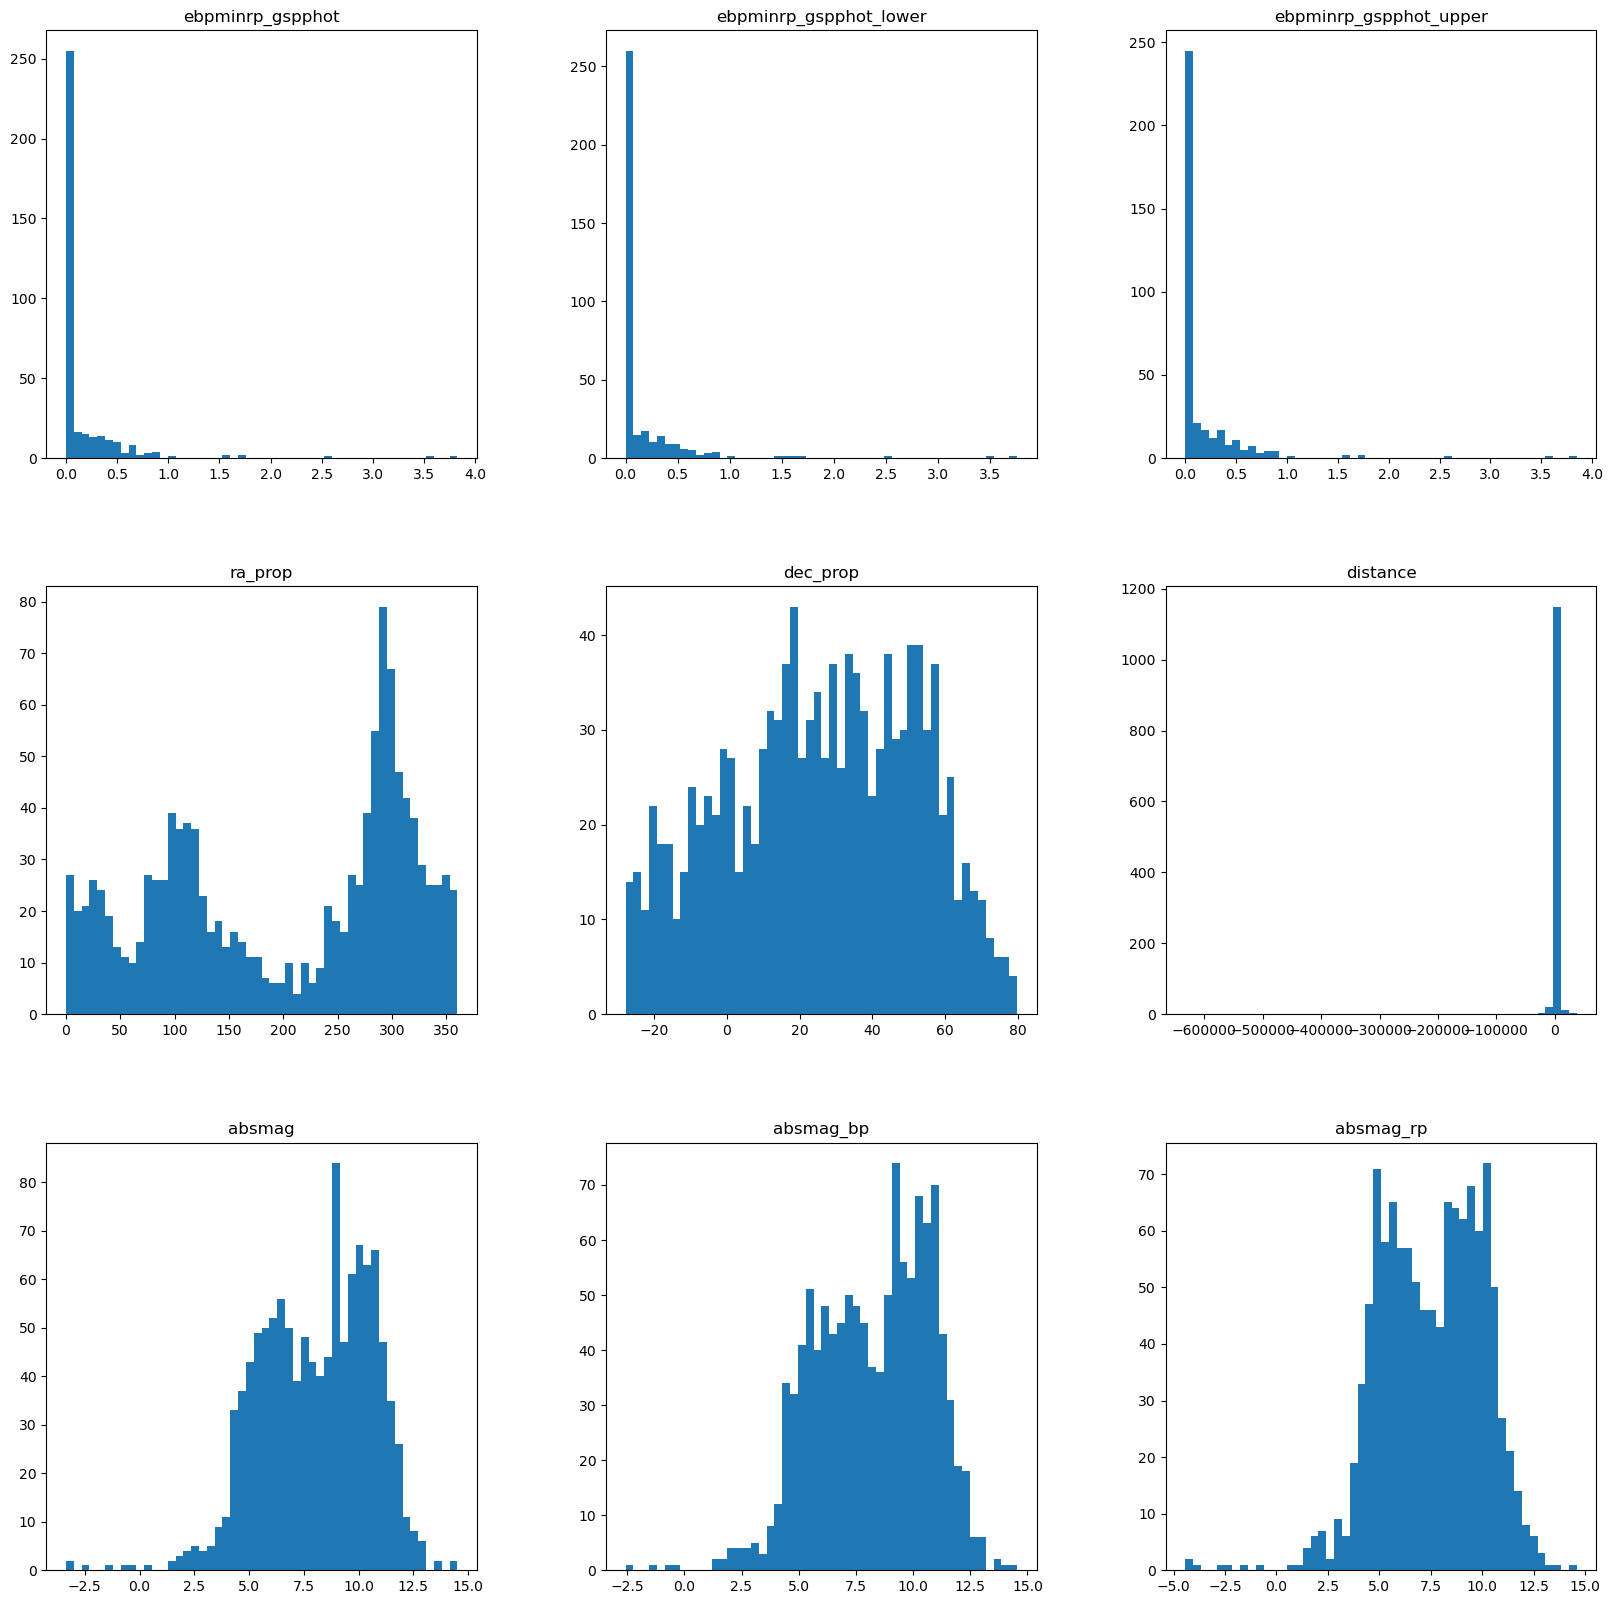

['ebpminrp_gspphot', 'ebpminrp_gspphot_lower', 'ebpminrp_gspphot_upper', 'libname_gspphot', 'ra_prop', 'dec_prop', 'distance', 'absmag', 'absmag_bp', 'absmag_rp']


In [8]:
# Plot feature histograms
import matplotlib.pyplot as plt
import seaborn as sns

df_hist = gaia_df.copy()

cols = ['ra','dec'] + df_hist.columns.to_list()[16:]
toshow = cols[-10:]

df_hist[toshow].hist(
    bins=50,
    grid = False,
    figsize=(20,20)
)
plt.show()
print(toshow)

### Handle outliers test

In [8]:
gaia_skewed = ['ra_error', 'dec_error','parallax_over_error','astrometric_n_obs_ac','astrometric_gof_al','astrometric_chi2_al',
          'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved','astrometric_sigma5d_max',
          'ruwe','phot_g_mean_flux','phot_g_mean_flux_error', 'phot_g_mean_flux_over_error','phot_bp_mean_flux', 
          'phot_bp_mean_flux_error', 'phot_bp_mean_flux_over_error','phot_rp_mean_flux', 'phot_rp_mean_flux_error', 
          'phot_rp_mean_flux_over_error','phot_bp_rp_excess_factor']

custom_skewed = ['CAR_mean_g','CAR_sigma_g','Eta_e_g','Freq1_harmonics_amplitude_0_g', 'Freq1_harmonics_amplitude_1_g', 
                 'Freq1_harmonics_amplitude_2_g', 'Freq1_harmonics_amplitude_3_g','Freq2_harmonics_amplitude_0_g', 
                 'Freq2_harmonics_amplitude_1_g', 'Freq2_harmonics_amplitude_2_g', 'Freq2_harmonics_amplitude_3_g',
                 'Freq3_harmonics_amplitude_0_g', 'Freq3_harmonics_amplitude_1_g', 'Freq3_harmonics_amplitude_2_g', 
                 'Freq3_harmonics_amplitude_3_g','LinearTrend_g', 'MaxSlope_g','PeriodLS_g', 'Period_fit_g','SlottedA_length_g']

custom_skewed2 = ['CAR_mean_r','CAR_sigma_r','Eta_e_r','Freq1_harmonics_amplitude_0_r', 'Freq1_harmonics_amplitude_1_r',
                    'Freq1_harmonics_amplitude_2_r', 'Freq1_harmonics_amplitude_3_r','Freq2_harmonics_amplitude_0_r',
                    'Freq2_harmonics_amplitude_1_r', 'Freq2_harmonics_amplitude_2_r', 'Freq2_harmonics_amplitude_3_r',
                    'Freq3_harmonics_amplitude_0_r', 'Freq3_harmonics_amplitude_1_r', 'Freq3_harmonics_amplitude_2_r',
                    'Freq3_harmonics_amplitude_3_r','LinearTrend_r', 'MaxSlope_r','PeriodLS_r', 'Period_fit_r','SlottedA_length_r']




### Outlier treatment functions

In [9]:
def outlier_thresholds_normal(dataframe, cols, z_threshold=3):
    
    df = dataframe.copy()

    thresholds = {}

    for col in cols:
        # Upper and lower bounds
        upper_limit = df[col].mean() + z_threshold*df[col].std()
        lower_limit = df[col].mean() - z_threshold*df[col].std()
        thresholds[col] = [upper_limit, lower_limit]

    return thresholds


def outlier_thresholds_skewed(dataframe, cols, iqr_threshold=1.5, upper_limit=None, lower_limit=None):
    df = dataframe.copy()

    thresholds = {}

    for col in cols:
        print(col)
        # Upper and lower bounds
        if upper_limit == None:
            ul = df[col].quantile(0.75) + iqr_threshold*(df[col].quantile(0.75)-df[col].quantile(0.25))
        else:
            ul = upper_limit

        if lower_limit == None:
            ll = df[col].quantile(0.25) - iqr_threshold*(df[col].quantile(0.75)-df[col].quantile(0.25))
        else:
            ll = lower_limit

        thresholds[col] = [ul, ll]
    
    return thresholds

def apply_thresholds(dataframe, cols, thresholds):
    df = dataframe.copy()

    for col in cols:
        # Upper and lower bounds
        upper_limit = thresholds[col][0]
        lower_limit = thresholds[col][1]

        # Ammend value if above the upper limit.
        # np.where parameters are (condition, value if true, value if false)
        df[col] = np.where(df[col]>upper_limit, upper_limit, df[col])
        # Ammend value if below the lower limit
        df[col] = np.where(df[col]<lower_limit, lower_limit, df[col])

    return df


### Handle outliers

In [10]:
import numpy as np
from scipy import stats

# remove infinite values
gaia_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop columns with dtypes = object
gaia_df.drop(gaia_df.dtypes[gaia_df.dtypes == 'object'].index.to_list(), axis=1, inplace=True)


alpha = 5e-2
for col in gaia_df.columns.to_list()[16:]:
    if gaia_df[col].skew() <0:
        (col, gaia_df[col].skew())




In [11]:
ots = outlier_thresholds_skewed(gaia_df, gaia_df.columns.to_list()[16:], iqr_threshold=2, upper_limit=None, lower_limit=0)
at = apply_thresholds(gaia_df, gaia_df.columns.to_list()[16:], ots)
at

ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
nu_eff_used_in_astrometry
pseudocolour
pseudocolour_error
ra_pseudocolour_corr
dec_pseudocolour_corr
parallax_pseudocolour_corr
pmra_pseudocolour_corr
pmdec_pseudocolour_corr
astrometric_matched_transits
visibility_periods_used
astrometric_sigma5d_max
matched_transits
new_matched_transits
matched_transits_removed
ipd_gof_harmonic_amplitude
ipd_gof_harmonic_phase
ipd_frac_multi_peak
ipd_frac_odd_win
ruwe
scan_direction_strength_k1
scan_direction_strength_k2
scan_direction_strength_k3
scan_direction_strength_k4
scan_direction_mean_k1
scan_direction_mean_k2
scan_direction_mean_k3
scan_direction_mean_k4
phot_g_n_obs
phot_g_mean_flux
phot_

,ra,dec,Eclipsing,eclipse_clear,Clarity,ra_error,dec_error,parallax,parallax_error,parallax_over_error,...,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,ra_prop,dec_prop,distance,absmag,absmag_bp,absmag_rp
2,253.496083,20.169556,1,0.0,1.0,0.039632,0.046843,1.300964,0.067019,19.412003,...,NaN,NaN,NaN,NaN,253.496083,20.169555,768.660740,8.673339,8.824500,8.237304
3,89.448833,54.331306,0,0.0,1.0,0.040157,0.039191,0.493226,0.054354,9.074386,...,0.2866,0.1436,0.1296,0.1586,89.448833,54.331306,2027.469375,4.708795,5.062490,4.114098
9,93.703083,9.574389,0,0.0,2.0,0.046643,0.043816,2.298076,0.058617,39.204643,...,0.0189,0.0054,0.0016,0.0104,93.703084,9.574388,435.146557,4.225089,4.438611,3.814447
12,99.448000,-25.689028,0,0.0,1.0,0.117476,0.173016,0.732069,0.223620,3.273725,...,NaN,NaN,NaN,NaN,99.448001,0.000000,1365.991128,9.212041,9.395890,8.615207
13,349.114875,59.805056,0,0.0,1.0,0.013967,0.015068,1.289088,0.017099,75.388130,...,0.0048,0.0010,0.0002,0.0027,349.114875,59.805055,775.742473,5.121122,5.347558,4.737121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5703,10.539250,41.258667,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5704,10.625167,41.936806,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5705,10.941000,41.266278,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5706,10.357167,40.739806,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature plots

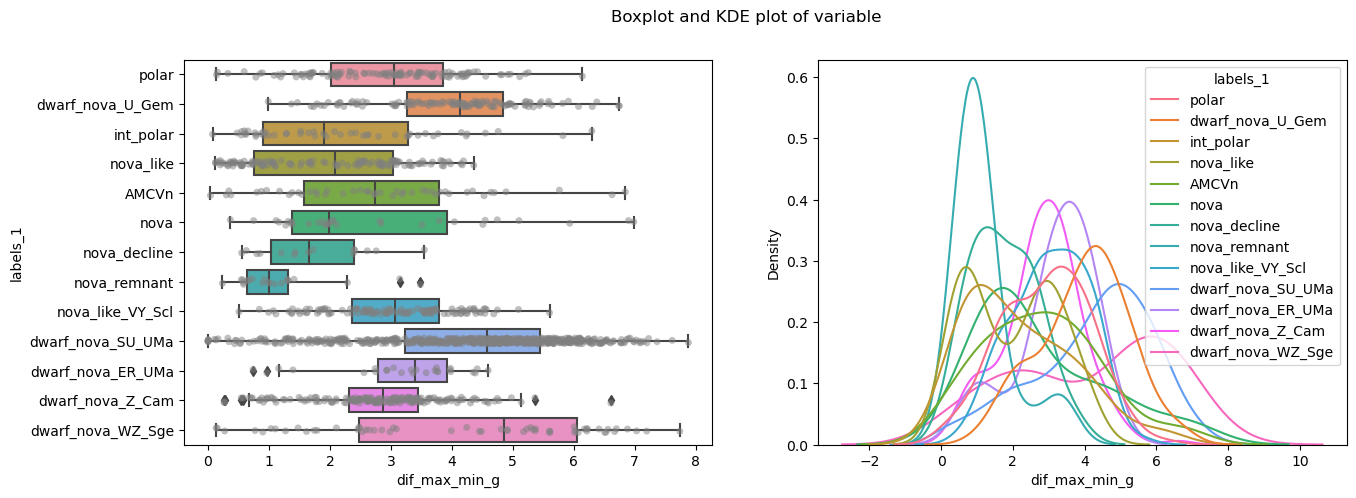

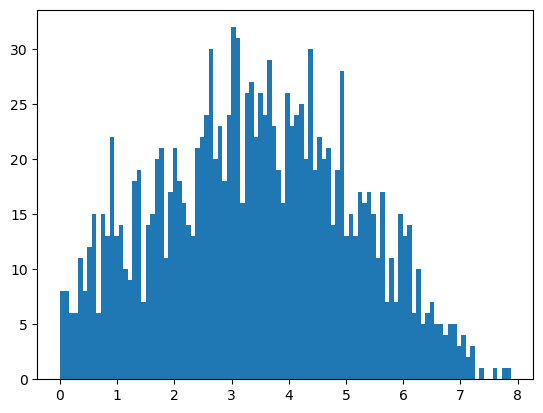

<Figure size 500x300 with 0 Axes>

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
dataframe = lc_features_df
name = 'dif_max_min_g'
limits = None
labels = 'labels_1'

droplist = ['Eta_e_r','Freq3_harmonics_rel_phase_3_r','Freq3_harmonics_rel_phase_1_g','Freq1_harmonics_rel_phase_2_r',
            'Freq1_harmonics_rel_phase_3_r','Freq2_harmonics_rel_phase_2_g','Freq3_harmonics_rel_phase_2_r',]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Boxplot and KDE plot of variable')

sns.boxplot(ax=axes[0], data=dataframe, x=name, y=labels)
sns.stripplot(ax=axes[0], data=dataframe, x=name, y=labels, color='grey', alpha=0.5)
axes[0].set(xlim=limits)
sns.kdeplot(ax=axes[1], x=name, data=dataframe, hue=labels, common_norm=False)
axes[1].set(xlim=limits)
plt.show()


# dataframe[name].hist(bins=75, grid=False,figsize=(5,3))
plt.hist(dataframe[name], bins=100)
plt.xlim(limits)
plt.figure(figsize=(5,3))

plt.show()

### Get mutual information, VIF and ANOVA scores

In [20]:
# Get mutual information scores for g band light curve features
# from filtermethods import mutual_info_scores
from filtermethods import FilterMethods
from sklearn import preprocessing
from sklearn.impute import KNNImputer

# From Gaia features dataframe drop rows without a Gaia counterpart.
X = gaia_df.copy()
X = X.dropna(subset=['ra_error']).reset_index(drop=True)

# Get labels
le = preprocessing.LabelEncoder()
le.fit(X[label_scheme])
y = le.transform(X[label_scheme])

# Define X. Drop columns non-numeric types and columns with high missing values
X = pd.concat([X[['ra','dec']], X.iloc[:,16:]], axis=1)
X = X[X.dtypes[X.dtypes != 'object'].index]
X = X.dropna(thresh=X.shape[0]*0.70,axis=1)

# Drop columns that convey the same information as other columns
droplist = ['phot_rp_mean_flux','phot_bp_mean_flux','classprob_dsc_combmod_galaxy','phot_g_mean_flux','classprob_dsc_combmod_star',
            'classprob_dsc_combmod_quasar']
X = X.drop(columns=droplist)
print(X.shape)
print(X.isnull().sum())

fm = FilterMethods(X, y)

# Get mutual information scores
mi = fm.mutual_info(KNNImputer(n_neighbors=5, 
                               weights='distance', 
                               metric='nan_euclidean', 
                               keep_empty_features=True)).sort_values(by='mutual_info_score', ascending=False)

# Get ANOVA scores
anova = fm.anova_oneway()

# Get VIF scores
vif = fm.calc_vif(imputer=KNNImputer(n_neighbors=5,
                                     weights='distance', 
                                     metric='nan_euclidean', 
                                     keep_empty_features=True))

# Get VIF scores with threshold reduction
vif10 = fm.vif_threshold_reduction(threshold=5,imputer=KNNImputer(n_neighbors=5, 
                                                                   weights='distance', 
                                                                   metric='nan_euclidean', 
                                                                   keep_empty_features=True))

# Get mutual information scores for r band light curve features

# Get mutual information scores for gaia features

# Get ANOVA scores for g band light curve features

# Get ANOVA scores for r band light curve features

# Get ANOVA scores for gaia features

(1269, 83)
ra                                   0
dec                                  0
ra_error                             0
dec_error                            0
parallax                            73
parallax_error                      73
parallax_over_error                 73
pm                                  73
pmra                                73
pmra_error                          73
pmdec                               73
pmdec_error                         73
ra_dec_corr                          0
ra_parallax_corr                    73
ra_pmra_corr                        73
ra_pmdec_corr                       73
dec_parallax_corr                   73
dec_pmra_corr                       73
dec_pmdec_corr                      73
parallax_pmra_corr                  73
parallax_pmdec_corr                 73
pmra_pmdec_corr                     73
astrometric_n_obs_al                 0
astrometric_n_obs_ac                 0
astrometric_n_good_obs_al            0
astrometric_n_

In [148]:
mi

,features,mutual_info_score,mutual_info_score_rank
82,absmag_rp,0.361409,1
80,absmag,0.328562,2
81,absmag_bp,0.316213,3
62,phot_rp_mean_mag,0.171210,4
52,phot_g_mean_flux_error,0.166319,5
79,distance,0.162568,6
4,parallax,0.162025,7
58,phot_bp_mean_mag,0.161218,8
2,ra_error,0.158727,9
54,phot_g_mean_mag,0.148284,10


In [136]:
fm2= FilterMethods(X.drop(columns=vif10['feature']), y)
fm2.calc_vif(KNNImputer(n_neighbors=5,
                                     weights='distance', 
                                     metric='nan_euclidean', 
                                     keep_empty_features=True)).sort_values(by='VIF', ascending=False)

,variables,VIF
22,new_matched_transits,4.357549
40,ecl_lon,4.031195
20,astrometric_params_solved,3.898401
25,ipd_gof_harmonic_phase,3.701439
3,pm,3.518258
9,ra_pmdec_corr,3.158825
11,dec_pmra_corr,3.131155
19,astrometric_excess_noise,2.973651
34,phot_bp_rp_excess_factor,2.805208
2,parallax_over_error,2.740145


In [21]:
anova.sort_values(by='p_value', ascending=True)

,features,F_test_stat,p_value
80,absmag,163.725517,6.602901e-184
82,absmag_rp,162.368024,8.310190e-183
81,absmag_bp,157.222740,1.357709e-178
62,phot_rp_mean_mag,61.560205,5.096297e-85
54,phot_g_mean_mag,57.685152,3.456946e-80
58,phot_bp_mean_mag,52.598326,9.870085e-74
4,parallax,32.249200,4.148763e-46
11,pmdec_error,26.661445,3.257237e-38
5,parallax_error,25.791031,5.773782e-37
9,pmra_error,25.562231,1.231708e-36
